# Woodbury Identity

A very useful mathematical formula that can help speed up various aspects of statistics / data analytics is the Woodbury Identity. The Woodbury Identity is commonly used to speed up the calculations of matrix multiplications which are used in things such as conditional distributions in Bayesian statistics. A simplified version of the Woodbury Identity is the following:

$(\textbf{I}_n + \textbf{AB})^{-1}\textbf{A} = \textbf{A}(\textbf{I}_p + \textbf{BA})^{-1}$

where **I** is the identity matrix and
*   $\textbf{A}$ is size $n × p$ ($n$ rows, $p$ columns)
*   $\textbf{B}$ is size $p × n$
*   $\textbf{I}_n$ is an identity matrix of size $n × n$
*   $\textbf{I}_p$ is an identity matrix of size $p × p$

We aren't going to look at the maths behind this, instead we are going to look at the speed benefits of using one side or the other based on the sizes of the matrices being used.

## Computational Cost of Left Side

Let's start in the middle (of the left hand side) and work outwards. We begin by looking at the matrix multiplication $\textbf{AB}$. Based on the sizes of the matrix above, the resulting matrix is $n × n$ and the computational complexity is:

 $O(n^2p)$.

We can the add this to $I_n$ which is $O(n^2)$ if we do it naively, so that gives us an updated total complexity of

$O(n^2p + n^2)$

We then need to do the inversion of the combined matrix (which is $n × n$) which takes $O(n^3)$, so we now have

$O(n^2p + n^2 + n^3)$

Finally we need to multiply the results $n × n$ matrix by $\textbf{A}$ which is $n × p$ and takes $O(n^2p)$, so we have 

$O(2n^2p + n^2 + n^3)$

If we assume we don't know the size of $n$ and $p$, e.g. we don't know if they are roughly the same or one dominates, then we can't say how it was scale

## Computational Cost of Right Hand Side

We can follow the same logic through for the other size, so again starting in the middle we can do $\textbf{BA}$ which this time takes:

$O(np^2)$

We then add the resulting $p × p$ matrix to the Identity matrix which takes $O(p^2)$, so our new total is

$O(np^2 + p^2)$

We are now inverting a $p \times p$ matrix which we know takes $O(p^3)$ giving us:

$O(np^2 + p^2 + p^3)$

Finally we do $\textbf{A}$ which is size $n × p$ multiplied by our $p \times p$ matrix which takes $O(np^2)$, so our total is

$O(2np^2 + p^2 + p^3)$

We basically have the same as the left hand side equation, but we have swapped $n$ with $p$



## Dependancy on size of $n$ and $p$

For the two different sides, we have worked out two different complexities. Generally we have $n > p$, but this is not always the cases. Let's look at 3 different cases and see how the complexity scales.

### Case 1: $n >> p$

Left hand side is $O(2n^2p + n^2 + n^3)$ which simplifies to $O(n^3)$

Right hand side is $O(2np^2 + p^2 + p^3)$ which simplifies to $O(n)$

### Case 2: $n=p$

Left hand side is $O(2n^2p + n^2 + n^3)$ which simplifies to $O(n^3)$ or equivilantly $O(p^3)$

Right hand side is $O(2np^2 + p^2 + p^3)$ which simplifies to $O(n^3)$ or equivilantly $O(p^3)$

### Case 3: $n << p$

Left hand side is $O(2n^2p + n^2 + n^3)$ which simplifies to $O(p)$

Right hand side is $O(2np^2 + p^2 + p^3)$ which simplifies to $O(p^3)$

## Generate some data

Let's write a function to demonstrate the above, its not necessary as simple as the 3 situations above, but we can try to show the rough idea

In [1]:
import numpy as np

def generate_data(n, p):
  # function to generate data
  A = np.random.rand(n, p)
  B = np.random.rand(p, n)
  I_n = np.identity(n)
  I_p = np.identity(p)
  return A, B, I_n, I_p


## Write some functions to simulate

Let's write a function to calculate each side and also double check that it gives the same answer (you should do more checking than this in practice)!

In [2]:
def left_side(A, B, I_n):
  # function to calculate left hand side of Woodbury Identity
  return np.linalg.inv(I_n + A@B) @ A

def right_side(A, B, I_p):
  # function to calculate right hand side of Woodbury Identity
  return A @ np.linalg.inv(I_p + B@A)

A, B, I_n, I_p = generate_data(3,2)

print(left_side(A, B, I_n))
print(right_side(A, B, I_p))

[[ 0.13820814  0.30422487]
 [ 0.53019894 -0.05550805]
 [ 0.27287541  0.10982779]]
[[ 0.13820814  0.30422487]
 [ 0.53019894 -0.05550805]
 [ 0.27287541  0.10982779]]


## Simulated Comparison

Let's repeat the experiment 50 times and see the results

In [3]:
import timeit

def time_sides(n, p, times=50):
  A, B, I_n, I_p = generate_data(n, p)
  # left side
  def left_side():
    np.linalg.inv(I_n + A@B) @ A
  # right side
  def right_side():
    A @ np.linalg.inv(I_p + B@A)
  # time it
  left_total_time = timeit.timeit(left_side, number=times)
  right_total_time = timeit.timeit(right_side, number=times)
  return left_total_time, right_total_time


In [4]:
time_sides(1000,10)

(1.8521238589964923, 0.004678581994085107)

In [5]:
time_sides(100,100)

(0.012612036000064109, 0.01121421299467329)

In [6]:
time_sides(10,1000)

(0.004094554002222139, 1.6831300819976605)

## Scaling with $n$

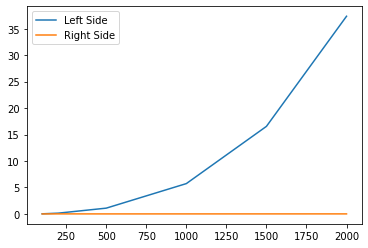

In [ ]:
ns = [100,200,500,1000,1500,2000]
left_times_n = []
right_times_n = []
for n in ns:
  new_times = time_sides(n, 10)
  left_times_n.append(new_times[0])
  right_times_n.append(new_times[1])

import matplotlib.pyplot as plt

plt.plot(ns, left_times_n, label='Left Side')
plt.plot(ns, right_times_n, label='Right Side')
plt.legend()
plt.show()

# Scaling with $p$

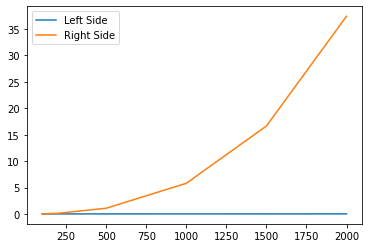

In [ ]:
ps = [100,200,500,1000,1500,2000]
left_times_p = []
right_times_p = []
for p in ps:
  new_times = time_sides(10, p)
  left_times_p.append(new_times[0])
  right_times_p.append(new_times[1])

plt.plot(ps, left_times_p, label='Left Side')
plt.plot(ps, right_times_p, label='Right Side')
plt.legend()
plt.show()

# Scaling Both

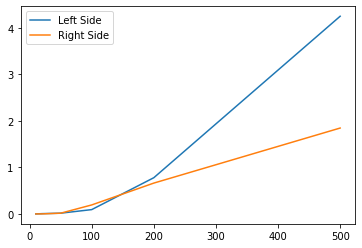

In [ ]:
nps = [10,20,50,100,200,500]
left_times_np = []
right_times_np = []
for n_p in nps:  # dont use 'np' here
  new_times = time_sides(n_p, n_p)
  left_times_np.append(new_times[0])
  right_times_np.append(new_times[1])

import matplotlib.pyplot as plt

plt.plot(nps, left_times_np, label='Left Side')
plt.plot(nps, right_times_np, label='Right Side')
plt.legend()
plt.show()